# **1. Descriptive Statistics**



Mengecek tipe data setiap kolom dan jumlah nilai yang hilang.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
from textwrap import wrap

In [ ]:
df = pd.read_csv("TravelInsurancePrediction.csv")
df = df.drop(labels='Unnamed: 0', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1987 non-null   int64 
 1   Employment Type      1987 non-null   object
 2   GraduateOrNot        1987 non-null   object
 3   AnnualIncome         1987 non-null   int64 
 4   FamilyMembers        1987 non-null   int64 
 5   ChronicDiseases      1987 non-null   int64 
 6   FrequentFlyer        1987 non-null   object
 7   EverTravelledAbroad  1987 non-null   object
 8   TravelInsurance      1987 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 139.8+ KB


## **Informasi Data** 
*   Terdapat 9 kolom kolom data setelah membuang kolom index yang berjudul 'Unnamed: 0'
*   Terdapat 1987 baris data
*   Terdapat 2 jenis tipe data, yaitu int64 dan object
*   Tidak terdapat baris data dengan nilai yang hilang atau null

In [ ]:
df.sample(5)

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
927,33,Private Sector/Self Employed,Yes,1500000,5,1,Yes,Yes,1
869,33,Private Sector/Self Employed,Yes,1400000,3,0,No,Yes,1
1100,27,Private Sector/Self Employed,No,450000,3,0,No,No,1
1674,34,Private Sector/Self Employed,No,950000,3,0,Yes,No,0
1271,25,Private Sector/Self Employed,Yes,500000,4,1,No,No,1


In [ ]:
df['ChronicDiseases'].value_counts()

0    1435
1     552
Name: ChronicDiseases, dtype: int64

In [ ]:
df['TravelInsurance'].value_counts()

0    1277
1     710
Name: TravelInsurance, dtype: int64

In [ ]:
df.describe()

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000
mean,29.650226,9.327630e+05,4.752894,0.277806,0.357323
std,2.913308,3.768557e+05,1.609650,0.448030,0.479332
min,25.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,28.000000,6.000000e+05,4.000000,0.000000,0.000000
50%,29.000000,9.000000e+05,5.000000,0.000000,0.000000
75%,32.000000,1.250000e+06,6.000000,1.000000,1.000000
max,35.000000,1.800000e+06,9.000000,1.000000,1.000000


## **Nilai Kosong**

In [ ]:
df.isna().sum()

Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

Tidak terdapat kolom dengan nilai null, semua data terisi dengan lengkap.

## **Label Encoding**

Merubah tipe data yang tidak sesuai untuk kolom ChronicDiseases dan TravelInsurance (int64 menjadi object).

In [ ]:
# Encode ChronicDiseases dan TravelInsurance menjadi data object (Categorical)

map_disease = {
    0: 'No',
    1: 'Yes'
}

map_insurance = {
    0: 'No',
    1: 'Yes'
}

df['ChronicDiseases'] = df['ChronicDiseases'].map(map_disease)
df['TravelInsurance'] = df['TravelInsurance'].map(map_insurance)

df

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,Yes,No,No,No
1,31,Private Sector/Self Employed,Yes,1250000,7,No,No,No,No
2,34,Private Sector/Self Employed,Yes,500000,4,Yes,No,No,Yes
3,28,Private Sector/Self Employed,Yes,700000,3,Yes,No,No,No
4,28,Private Sector/Self Employed,Yes,700000,8,Yes,Yes,No,No
...,...,...,...,...,...,...,...,...,...
1982,33,Private Sector/Self Employed,Yes,1500000,4,No,Yes,Yes,Yes
1983,28,Private Sector/Self Employed,Yes,1750000,5,Yes,No,Yes,No
1984,28,Private Sector/Self Employed,Yes,1150000,6,Yes,No,No,No
1985,34,Private Sector/Self Employed,Yes,1000000,6,No,Yes,Yes,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1987 non-null   int64 
 1   Employment Type      1987 non-null   object
 2   GraduateOrNot        1987 non-null   object
 3   AnnualIncome         1987 non-null   int64 
 4   FamilyMembers        1987 non-null   int64 
 5   ChronicDiseases      1987 non-null   object
 6   FrequentFlyer        1987 non-null   object
 7   EverTravelledAbroad  1987 non-null   object
 8   TravelInsurance      1987 non-null   object
dtypes: int64(3), object(6)
memory usage: 139.8+ KB


In [ ]:
df[df.duplicated(keep=False) == True]

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,Yes,No,No,No
1,31,Private Sector/Self Employed,Yes,1250000,7,No,No,No,No
3,28,Private Sector/Self Employed,Yes,700000,3,Yes,No,No,No
5,25,Private Sector/Self Employed,No,1150000,4,No,No,No,No
6,31,Government Sector,Yes,1300000,4,No,No,No,No
...,...,...,...,...,...,...,...,...,...
1978,34,Private Sector/Self Employed,Yes,700000,5,No,No,No,Yes
1979,28,Private Sector/Self Employed,Yes,1100000,4,Yes,No,No,No
1980,25,Private Sector/Self Employed,No,1150000,5,Yes,No,No,No
1984,28,Private Sector/Self Employed,Yes,1150000,6,Yes,No,No,No


Membagi fitur-fitur menjadi sesuai jenisnya, yaitu numerik (nums) dan kategorikal (cats).

In [ ]:
nums = ['Age', 'AnnualIncome', 'FamilyMembers']
cats = ['Employment Type', 'GraduateOrNot', 'ChronicDiseases', 'FrequentFlyer', 'EverTravelledAbroad', 'TravelInsurance']

In [ ]:
df[nums].describe()

,Age,AnnualIncome,FamilyMembers
count,1987.000000,1.987000e+03,1987.000000
mean,29.650226,9.327630e+05,4.752894
std,2.913308,3.768557e+05,1.609650
min,25.000000,3.000000e+05,2.000000
25%,28.000000,6.000000e+05,4.000000
50%,29.000000,9.000000e+05,5.000000
75%,32.000000,1.250000e+06,6.000000
max,35.000000,1.800000e+06,9.000000


## **Statistical Summary (Numerical)**

Age:
- Mean (29.650226) > Median (29.000000), tidak berbeda jauh
- Min (25.000000) dan Max (35.000000) tidak jauh

Annual Income:
- Mean (9.327630e+05) > Median (9.000000e+05), tidak berbeda jauh
- Min (3.000000e+05) dan Max (1.800000e+06) cukup jauh sehingga menandakan adanya kemungkinan terdapat outliers. Perlu dilakukan analisa lebih lanjut sebelum melanjutkan ke tahap pemodelan menggunakan machine learning.

Family Members:
- Mean (4.752894) dan Median (5.000000) tidak timpang
- Min (2.000000) dan Max (9.000000) tidak jauh



In [ ]:
df[cats].describe()

,Employment Type,GraduateOrNot,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
count,1987,1987,1987,1987,1987,1987
unique,2,2,2,2,2,2
top,Private Sector/Self Employed,Yes,No,No,No,No
freq,1417,1692,1435,1570,1607,1277


## **Statistical Summary (Categorical)**

Jumlah data unik pada fitur-fitur kategorikal hanya 2, sehingga tidak perlu dilakukan encoding pada tahap preprocessing.

# **2. Univariate Analysis**

In [ ]:
df.sample(5)

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
1323,34,Private Sector/Self Employed,Yes,1750000,5,No,No,No,No
1154,34,Private Sector/Self Employed,Yes,1000000,5,Yes,No,No,No
1073,28,Private Sector/Self Employed,Yes,500000,7,No,No,No,No
1978,34,Private Sector/Self Employed,Yes,700000,5,No,No,No,Yes
505,28,Private Sector/Self Employed,Yes,800000,4,No,No,No,No


In [ ]:
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom Employment Type:
Private Sector/Self Employed    1417
Government Sector                570
Name: Employment Type, dtype: int64

Value count kolom GraduateOrNot:
Yes    1692
No      295
Name: GraduateOrNot, dtype: int64

Value count kolom ChronicDiseases:
No     1435
Yes     552
Name: ChronicDiseases, dtype: int64

Value count kolom FrequentFlyer:
No     1570
Yes     417
Name: FrequentFlyer, dtype: int64

Value count kolom EverTravelledAbroad:
No     1607
Yes     380
Name: EverTravelledAbroad, dtype: int64

Value count kolom TravelInsurance:
No     1277
Yes     710
Name: TravelInsurance, dtype: int64



### Age

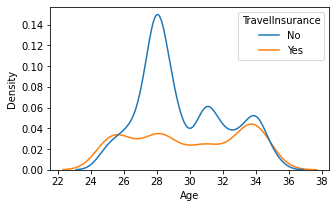

In [ ]:
plt.figure(figsize=(5,3))
sns.kdeplot(data=df, x="Age", hue="TravelInsurance")
plt.show()

Berdasarkan kepadatan di atas bahwa rata-rata pembeli Travel Insurance pada usia >32 dan <36 tahun, dan yang tidak membeli asuransi perjalanan rata-rata di usia 24 s/d 30 tahun

### Employment Type

<Figure size 360x216 with 0 Axes>

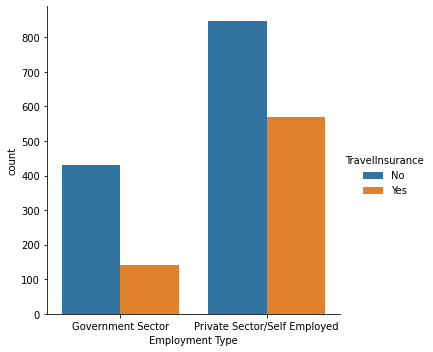

In [ ]:
plt.figure(figsize=(5,3))
sns.catplot(data=df, x="Employment Type",kind='count',hue="TravelInsurance")
plt.show()

Berdasarkan type pekerja yang membeli asuransi dari karyawan swasta

### Graduate

<Figure size 360x216 with 0 Axes>

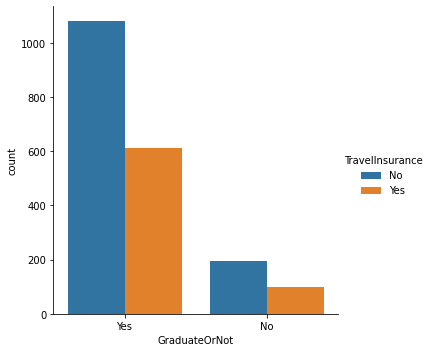

In [ ]:
plt.figure(figsize=(5,3))
sns.catplot(data=df, x="GraduateOrNot",kind='count',hue="TravelInsurance")
plt.show()

Berdasarkan perspektif lulus pendidikan atau tidak, orang yang lulus pendidikan memiliki preferensi untuk memiliki asuransi perjalanan

### Annual Income

<Figure size 360x216 with 0 Axes>

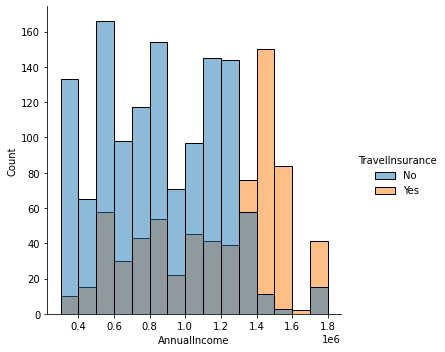

In [ ]:
plt.figure(figsize=(5,3))
sns.displot(data=df, x="AnnualIncome",hue="TravelInsurance")
plt.show()

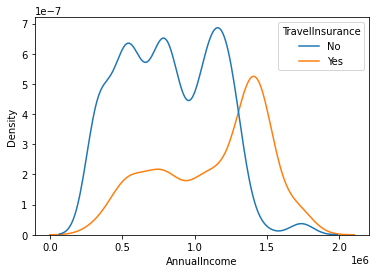

In [ ]:
sns.kdeplot(data=df, x="AnnualIncome",hue="TravelInsurance")
plt.show()

Berdasarkan penghasilan tahunan yang membeli asuransi perjalanan dengan penghasilan <1,3 Juta.

Pre Processing: Pengelompokan golongan menggunakan binning

### FamilyMembers

<Figure size 360x216 with 0 Axes>

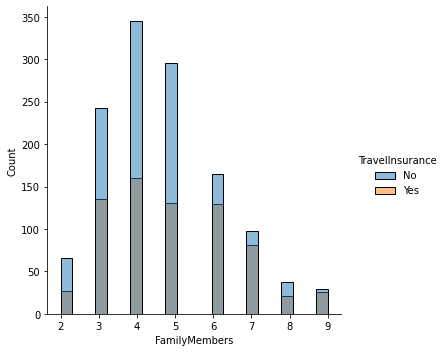

In [ ]:
plt.figure(figsize=(5,3))
sns.displot(data=df, x="FamilyMembers",hue="TravelInsurance")
plt.show()

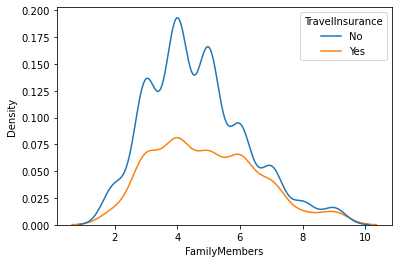

In [ ]:
sns.kdeplot(data=df, x="FamilyMembers",hue="TravelInsurance")
plt.show()

Berdasarkan jumlah anggota keluarga yang membeli asuransi perjalanan memiliki 3-7 anggota Keluarga

Pre processing: Pengelompokan jumlah keluarga menjadi 3 kategori menggunakan binning

### ChronicDiseases

<Figure size 360x216 with 0 Axes>

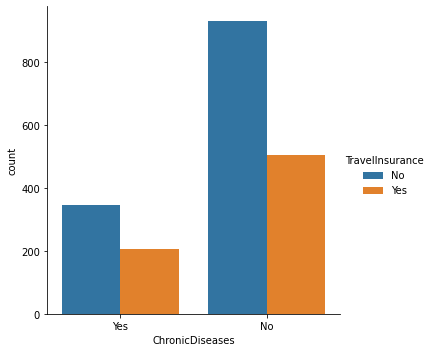

In [ ]:
plt.figure(figsize=(5,3))
sns.catplot(data=df, x="ChronicDiseases",kind='count',hue="TravelInsurance")
plt.show()

Berdasarkan perspektif penyakit kronis terlihat bahwa orang yang memiliki penyakit kronis cenderung tidak membeli asuransi

### FrequentFlyer

<Figure size 360x216 with 0 Axes>

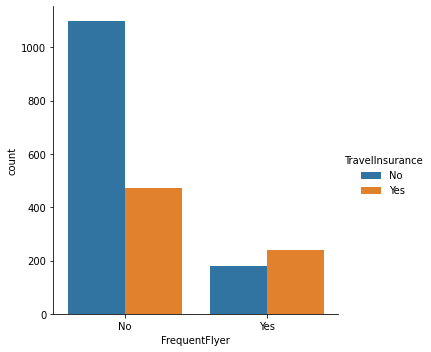

In [ ]:
plt.figure(figsize=(5,3))
sns.catplot(data=df, x="FrequentFlyer",kind='count',hue="TravelInsurance")
plt.show()

Berdasarkan orang yang sering melakukan perjalanan memiliki kecenderungan untuk membeli asuransi perjalanan

### EverTravelledAbroad

<Figure size 360x216 with 0 Axes>

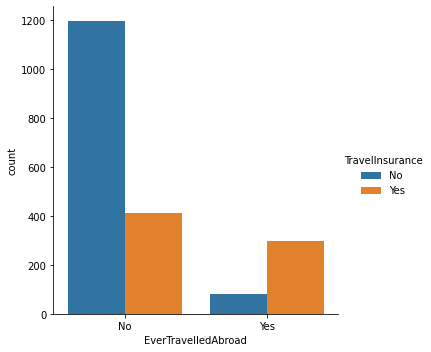

In [ ]:
plt.figure(figsize=(5,3))
sns.catplot(data=df, x="EverTravelledAbroad",kind='count',hue="TravelInsurance")
plt.show()

Orang yang biasa bepergian ke luar negeri kemungkinan akan membeli asuransi perjalanan

### Target Plot

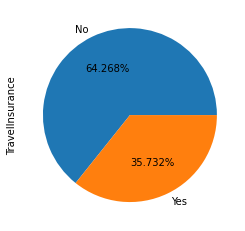

In [ ]:
df.TravelInsurance.value_counts().plot(x=None, y=None, kind='pie',autopct='%1.3f%%')
plt.show()

Distribusi pada target tidak merata karena yang membeli asuransi perjalanan dan tidak memiliki perbedaan, hal tersebut dapat mempengaruhi pembuatan model

## **Count Plot (Numerical)**

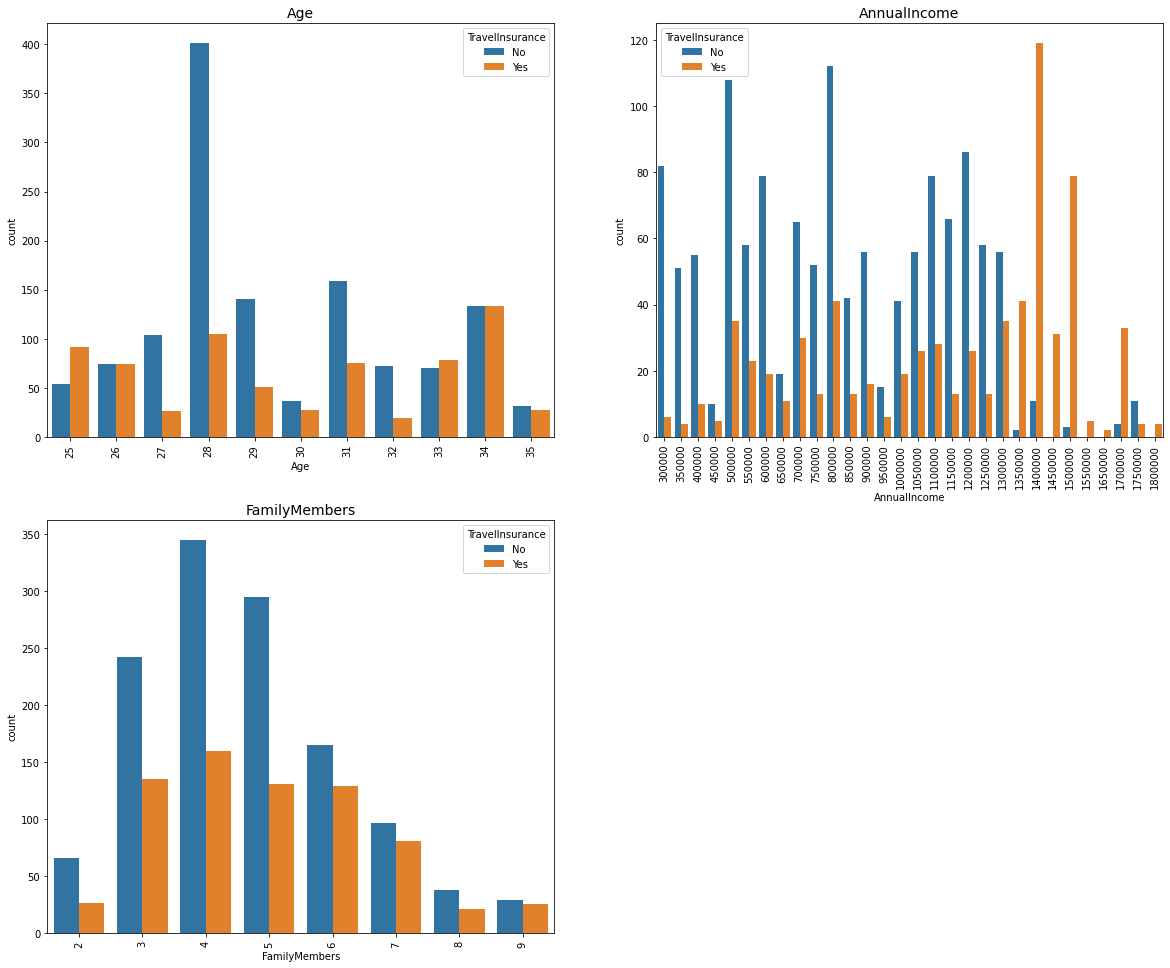

In [ ]:
plt.figure(figsize=(20,35))
i = 1
for col in nums:
    plt.subplot(4,2,i)
    sns.countplot(x = col, data = df, hue = 'TravelInsurance')
    plt.xticks(rotation = 90)
    plt.title(df[col].name, fontsize = 14)
#    plt.show()
    i+=1

## **Box Plot (Numerical)**

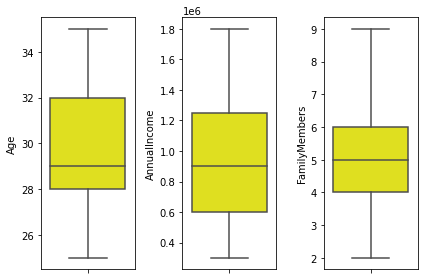

In [ ]:
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=df[nums[i]], color='yellow', orient='v')
    plt.tight_layout()

## **Displot (Numerical)**

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

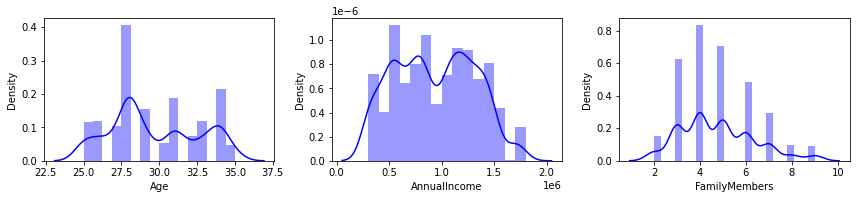

In [ ]:
plt.figure(figsize=(12, 5))
for i in range(0, len(nums)):
    plt.subplot(2, len(nums), i+1)
    sns.distplot(df[nums[i]], color='blue')
    plt.tight_layout()

## **Violin Plot (Numerical)**

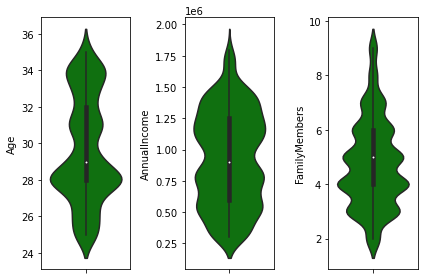

In [ ]:

for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.violinplot(y=df[nums[i]], color='green', orient='v')
    plt.tight_layout()

## **Count Plot (Categorical)**

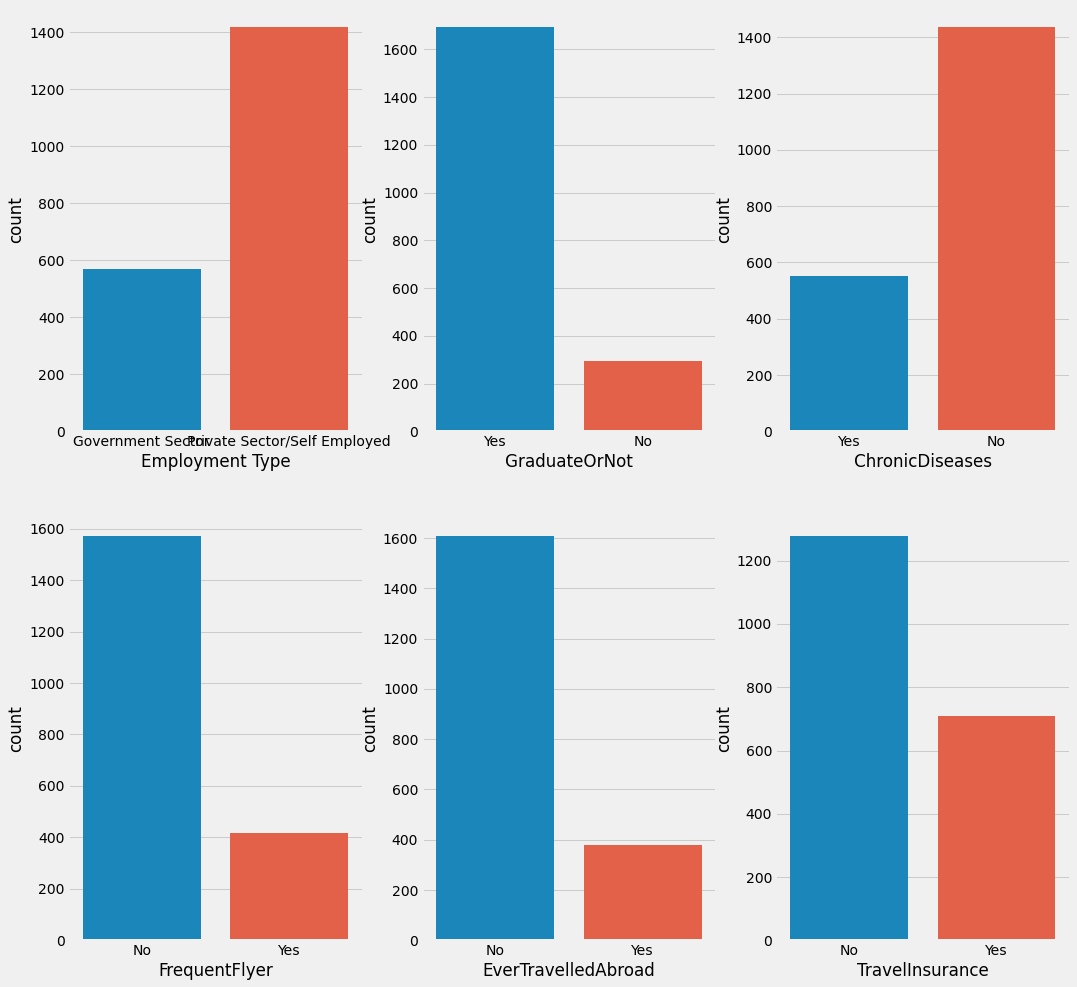

In [74]:

plt.figure(figsize=(16, 16))
for i in range(0, len(cats)):
    plt.subplot(2, 3, i+1)
    sns.countplot(x=df[cats[i]],  orient='h')

# **3. Multivariate Analysis**

## **Correlation Heatmap**

In [ ]:
df.corr() # Melihat bagaimana korelasi pada features berkategori numerical

,Age,AnnualIncome,FamilyMembers
Age,1.000000,-0.020101,0.027409
AnnualIncome,-0.020101,1.000000,-0.015367
FamilyMembers,0.027409,-0.015367,1.000000


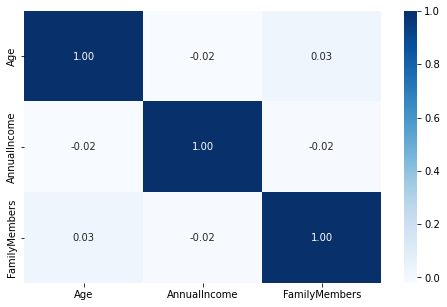

In [ ]:
plt.figure(figsize=(8, 5)) # Melihat korelasi menggunakan heatmap
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')
plt.show()

## **Pair Plots**

<Figure size 2160x2160 with 0 Axes>

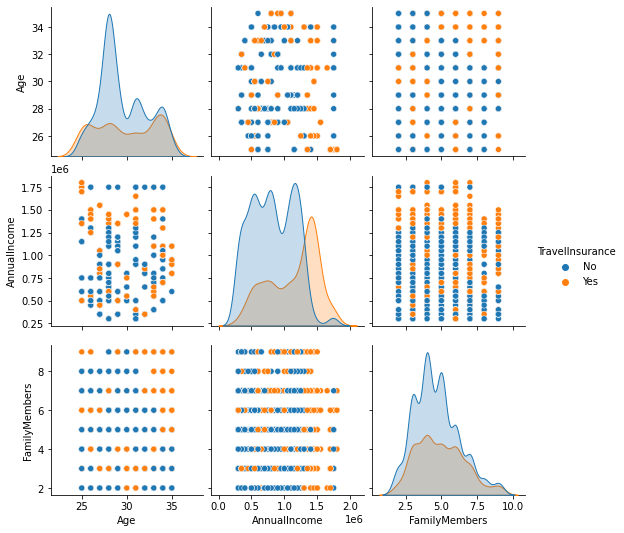

In [ ]:
plt.figure(figsize=(30, 30)) # Membuat pair plots pada type data numerical
sns.pairplot(df, diag_kind='kde', hue='TravelInsurance')
plt.show()

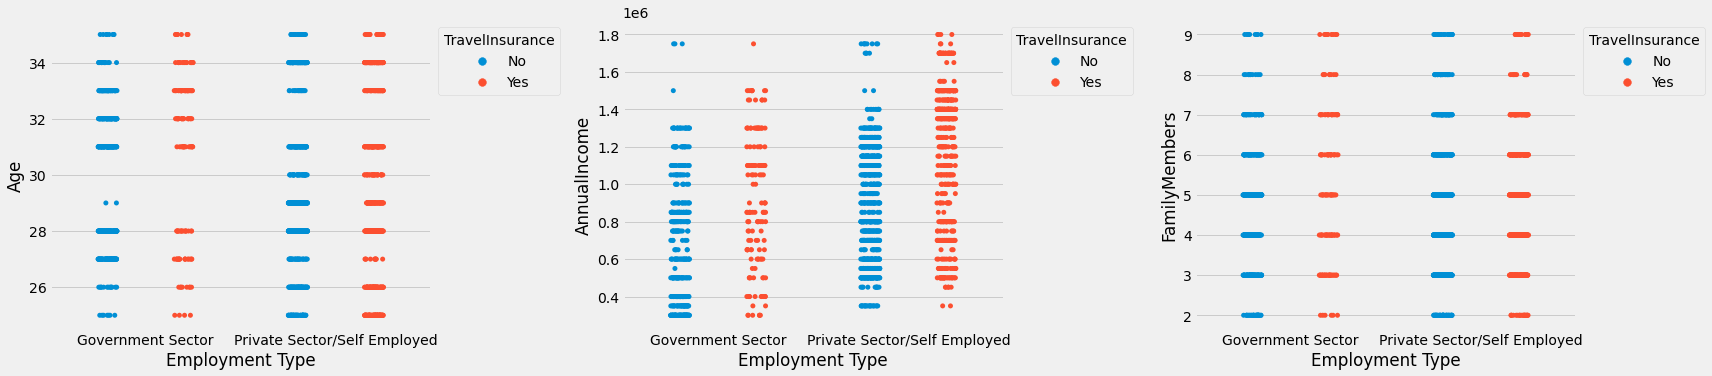

In [68]:
# Persebaran setiap kolom vs Employment Type
fig = plt.figure(figsize=(24, 15))
for i in range(0, len(nums)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='Employment Type', y=nums[i], hue='TravelInsurance', dodge=True) # gambar catplot/stripplotnya
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    plt.tight_layout()

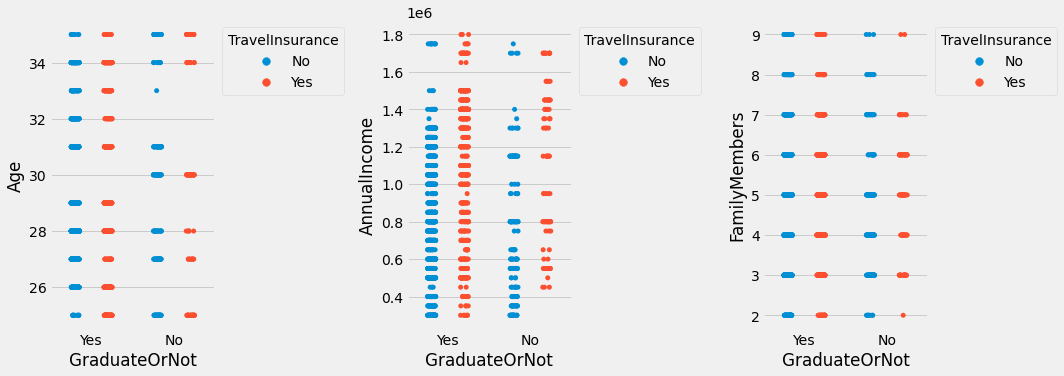

In [73]:
# Persebaran setiap kolom vs GraduateOrNot
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(nums)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='GraduateOrNot', y=nums[i], hue='TravelInsurance', dodge=True) # gambar catplot/stripplotnya
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    plt.tight_layout()

# **4. Business Insight**

Dari segi struktur data:
<br>
Penambahan informasi ID pelanggan untuk mempermudah identifikasi pelanggan dan pemeriksaan apakah data yang sama merupakan duplikat atau bukan.
<br>
<br>
Dari segi analisa data:
<br>
Analysis terkait plot persebaran datanya, sehingga dapat lebih memperkuat memprediksi bagaimana model yang akan di create. Harapannnya dapat memberikan hasil analisa yang cukup kuat sehingga perusahaan dapat mengalisis data untuk meningkatkan income perusahaan.

<Figure size 576x288 with 0 Axes>

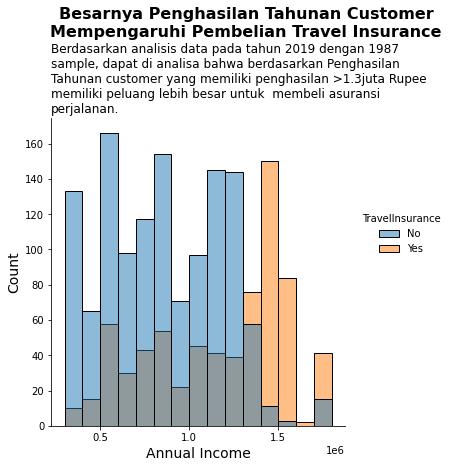

In [ ]:
# Business Insight: Annual Income

plt.figure(figsize=(8,4))
sns.displot(data=df, x="AnnualIncome",hue="TravelInsurance")
plt.xlabel('Annual Income', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.suptitle('\n'.join(wrap('Besarnya Penghasilan Tahunan Customer Mempengaruhi Pembelian Travel Insurance', 40)), x=0.55, y= 1.28, fontsize=16, fontweight='bold')
plt.title('\n'.join(wrap('Berdasarkan analisis data pada tahun 2019 dengan 1987 sample, dapat di analisa bahwa berdasarkan Penghasilan Tahunan customer yang memiliki penghasilan >1.3juta Rupee memiliki peluang lebih besar untuk  membeli asuransi perjalanan.', 60)), loc='left', y=1, fontsize=12, fontweight='light')
style.use('fivethirtyeight')
plt.show()

<Figure size 720x576 with 0 Axes>

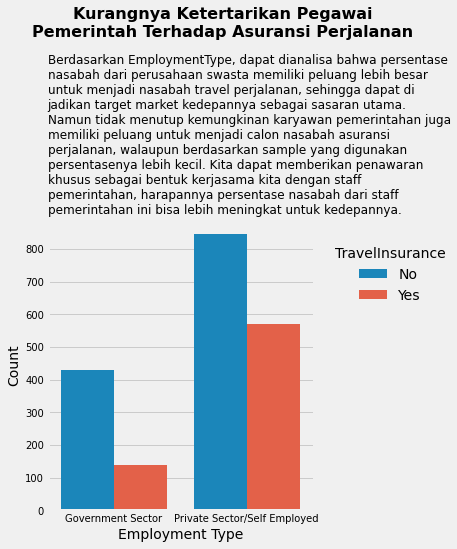

In [ ]:
# Business Insight: Employment Type

plt.figure(figsize=(10,8))
sns.catplot(data=df, x="Employment Type",kind='count',hue="TravelInsurance")
plt.xlabel('Employment Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.suptitle('\n'.join(wrap('Kurangnya Ketertarikan Pegawai Pemerintah Terhadap Asuransi Perjalanan', 40)), x=0.55, y= 1.55, fontsize=16, fontweight='bold')
plt.title('\n'.join(wrap('Berdasarkan EmploymentType, dapat dianalisa bahwa persentase nasabah dari perusahaan swasta memiliki peluang lebih besar untuk menjadi nasabah travel perjalanan, sehingga dapat di jadikan target market kedepannya sebagai sasaran utama. Namun tidak menutup kemungkinan karyawan pemerintahan juga memiliki peluang untuk menjadi calon nasabah asuransi perjalanan, walaupun berdasarkan sample yang digunakan persentasenya lebih kecil. Kita dapat memberikan penawaran khusus sebagai bentuk kerjasama kita dengan staff pemerintahan, harapannya persentase nasabah dari staff pemerintahan ini bisa lebih meningkat untuk kedepannya.', 60)), loc='left', y=1, fontsize=12, fontweight='light')
style.use('fivethirtyeight')
plt.show()

<Figure size 576x720 with 0 Axes>

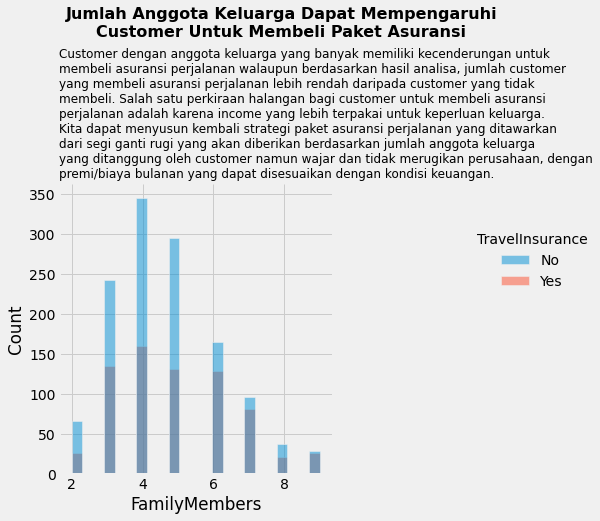

In [ ]:
# Business Insight: Family Members

plt.figure(figsize=(8, 10))
sns.displot(data=df, x="FamilyMembers",hue="TravelInsurance")
plt.suptitle('\n'.join(wrap('Jumlah Anggota Keluarga Dapat Mempengaruhi Customer Untuk Membeli Paket Asuransi', 50)), x=0.6, y= 1.45, fontsize=16, fontweight='bold')
plt.title('\n'.join(wrap('Customer dengan anggota keluarga yang banyak memiliki kecenderungan untuk membeli asuransi perjalanan walaupun berdasarkan hasil analisa, jumlah customer yang membeli asuransi perjalanan lebih rendah daripada customer yang tidak membeli. Salah satu perkiraan halangan bagi customer untuk membeli asuransi perjalanan adalah karena income yang lebih terpakai untuk keperluan keluarga. Kita dapat menyusun kembali strategi paket asuransi perjalanan yang ditawarkan dari segi ganti rugi yang akan diberikan berdasarkan jumlah anggota keluarga yang ditanggung oleh customer namun wajar dan tidak merugikan perusahaan, dengan premi/biaya bulanan yang dapat disesuaikan dengan kondisi keuangan.', 80)), loc='left', y=1.05, fontsize=12, fontweight='light')
plt.show()

<Figure size 432x576 with 0 Axes>

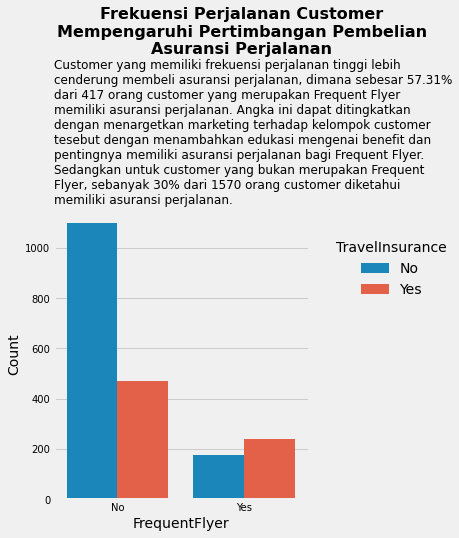

In [ ]:
# Business Insight: FrequentFlyer

plt.figure(figsize=(6,8))
sns.catplot(data=df, x="FrequentFlyer",kind='count',hue="TravelInsurance")
plt.xlabel('FrequentFlyer', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.suptitle('\n'.join(wrap('Frekuensi Perjalanan Customer Mempengaruhi Pertimbangan Pembelian Asuransi Perjalanan', 40)), x=0.6, y= 1.52, fontsize=16, fontweight='bold')
plt.title('\n'.join(wrap('Customer yang memiliki frekuensi perjalanan tinggi lebih cenderung membeli asuransi perjalanan, dimana sebesar 57.31% dari 417 orang customer yang merupakan Frequent Flyer memiliki asuransi perjalanan. Angka ini dapat ditingkatkan dengan menargetkan marketing terhadap kelompok customer tesebut dengan menambahkan edukasi mengenai benefit dan pentingnya memiliki asuransi perjalanan bagi Frequent Flyer. Sedangkan untuk customer yang bukan merupakan Frequent Flyer, sebanyak 30% dari 1570 orang customer diketahui memiliki asuransi perjalanan.', 60)), loc='left', y=1.05, fontsize=12, fontweight='light')
style.use('fivethirtyeight')
plt.show()

<Figure size 360x216 with 0 Axes>

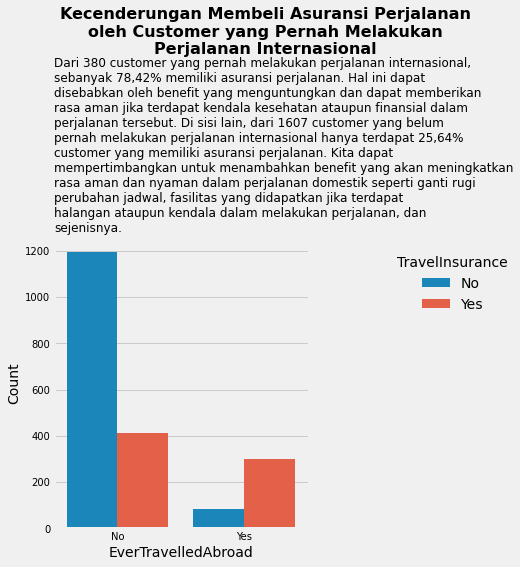

In [ ]:
# Business Insight: EverTravelledAbroad

plt.figure(figsize=(5,3))
sns.catplot(data=df, x="EverTravelledAbroad",kind='count',hue="TravelInsurance")
plt.xlabel('EverTravelledAbroad', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.suptitle('\n'.join(wrap('Kecenderungan Membeli Asuransi Perjalanan oleh Customer yang Pernah Melakukan Perjalanan Internasional', 45)), x=0.65, y= 1.6, fontsize=16, fontweight='bold')
plt.title('\n'.join(wrap('Dari 380 customer yang pernah melakukan perjalanan internasional, sebanyak 78,42% memiliki asuransi perjalanan. Hal ini dapat disebabkan oleh benefit yang menguntungkan dan dapat memberikan rasa aman jika terdapat kendala kesehatan ataupun finansial dalam perjalanan tersebut. Di sisi lain, dari 1607 customer yang belum pernah melakukan perjalanan internasional hanya terdapat 25,64% customer yang memiliki asuransi perjalanan. Kita dapat mempertimbangkan untuk menambahkan benefit yang akan meningkatkan rasa aman dan nyaman dalam perjalanan domestik seperti ganti rugi perubahan jadwal, fasilitas yang didapatkan jika terdapat halangan ataupun kendala dalam melakukan perjalanan, dan sejenisnya.', 65)), loc='left', y=1.05, fontsize=12, fontweight='light')
style.use('fivethirtyeight')
plt.show()

# **5. GIT**

https://github.com/rakamin-datagigs/final-project